# Regression Project
Brian Li \
10/15/23

My dependent variable is the percentage of the population in each state across the continental US that has experienced some form of depression.

My independent variables are the percentages of individuals who get sufficient sleep, binge drink, and are obese, respectively.

I sourced the data from the World Bank via Michael Minn, at https://michaelminn.net/tutorials/data/2017-brfss-states.csv, while state outlines were provided by the US Census Bureau, also via Michael Minn: https://michaelminn.net/tutorials/data/2015-2019-acs-states.geojson.

I just wanted to explore these three things relationship with depression.

In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal.lib
import pysal.model
import mgwr.gwr as gwr
import mgwr.sel_bw as sel_bw
import seaborn as sns

In [26]:
states = gpd.read_file("https://michaelminn.net/tutorials/data/2015-2019-acs-states.geojson")
states = states[~states["ST"].isin(['AK', 'HI', 'PR'])]
states = states.to_crs("EPSG:3857")
states = states[['Name', 'ST', 'geometry']]
brfss = pd.read_csv("https://michaelminn.net/tutorials/data/2017-brfss-states.csv")

In [29]:
state_data = states.merge(brfss, left_on='ST', right_on='State Abbreviation')
state_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Name                       49 non-null     object  
 1   ST                         49 non-null     object  
 2   geometry                   49 non-null     geometry
 3   State Name                 49 non-null     object  
 4   State Abbreviation         49 non-null     object  
 5   American Factfinder GEOID  49 non-null     object  
 6   Latitude                   49 non-null     float64 
 7   Longitude                  49 non-null     float64 
 8   Obese %                    49 non-null     float64 
 9   Obese MOE                  49 non-null     float64 
 10  Daily Fruit %              49 non-null     float64 
 11  Daily Fruit MOE            49 non-null     float64 
 12  Daily Vegetable %          49 non-null     float64 
 13  Daily Vegetable MOE        49

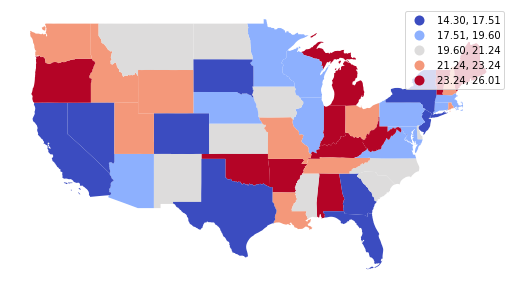

In [30]:
plt.rcParams['figure.figsize'] = [9, 6]
axis = state_data.plot("Depression %", cmap = "coolwarm", legend=True, scheme="quantiles")
axis.set_axis_off()
plt.show()

The distribution of the % of population that has depression is relatively symmetric.

The minimum for the data was 14.30%, the median was 20.53%, and the maximum was 26.01%.

The state with the highest % of the population experiencing some form of depression is West Virginia, which can be explained by the Appalachian region's higher poverty rates and general declining economy due to a traditional reliance on the coal industry.

The state with the lowest population % who had experienced depression is New Jersey (technically DC is lower but DC is not a state), which is unusual given that New Jersey does not rank particularly high in mental health access rates or any other statistics.

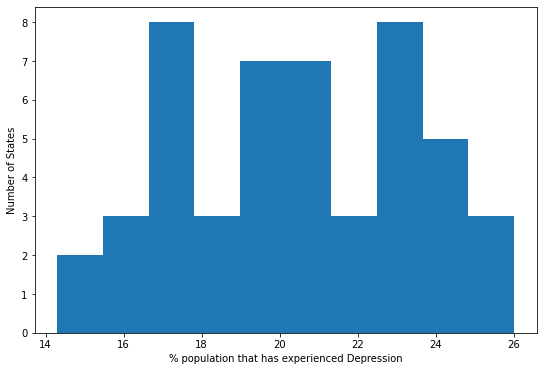

In [33]:
axis = plt.hist(state_data['Depression %'])
plt.xlabel('% population that has experienced Depression')
plt.ylabel('Number of States')
plt.show()

In [34]:
state_data['Depression %'].describe()

count    49.000000
mean     20.468980
std       3.028308
min      14.300000
25%      17.790000
50%      20.530000
75%      22.980000
max      26.010000
Name: Depression %, dtype: float64

In [36]:
temp = state_data[['Name', 'Depression %']]
temp = temp.dropna()
temp = temp.sort_values('Depression %', ascending=False)
temp = temp.reset_index(drop=True)
print(temp.head())

            Name  Depression %
0  West Virginia         26.01
1          Maine         25.99
2        Vermont         25.21
3       Arkansas         24.79
4       Kentucky         24.32


In [37]:
print(temp.tail())

                    Name  Depression %
44               Georgia         16.32
45              New York         16.03
46                Nevada         15.61
47            New Jersey         14.78
48  District of Columbia         14.30


The variable that has the strongest correlation with the dependent variable is Muscle Exercise %, which is the % of the state population that participated in muscle strengthening exercises two or more times per week, with a negative correlation and an R^2 value of 0.286.

These two variables are connected because exercise is linked to mental health and dopamine production, which could decrease likeliness of depression.

One variable that has no correlation with the dependent variable is Checkup Past 5 Years %, which has an R^2 value of 0.01.

In [38]:
data = state_data.select_dtypes(include=np.number)
r_squared = data.corr()['Depression %']**2
r_squared = r_squared.sort_values(ascending=False).round(3)
print(r_squared)

Depression %                1.000
Muscle Exercise %           0.286
Smokers %                   0.247
Hypertension %              0.202
Obese %                     0.196
High Cholesterol %          0.178
Aerobic Guidelines %        0.141
Drink Alcohol %             0.121
Binge Drinker %             0.108
Cholesterol Checked %       0.104
Daily Fruit %               0.103
Daily Vegetable %           0.082
Depression MOE              0.074
Healthcare Coverage %       0.024
Smokers MOE                 0.022
Cholesterol Checked MOE     0.020
Latitude                    0.017
Sufficient Sleep %          0.012
Checkup Past 5 Years %      0.010
Sufficient Sleep MOE        0.009
Aerobic Guidelines MOE      0.007
Daily Vegetable MOE         0.007
Binge Drinker MOE           0.005
Muscle Exercise MOE         0.004
Checkup Past 5 Years MOE    0.004
Hypertension MOE            0.003
Aerobic 150 MOE             0.002
Drink Alcohol MOE           0.001
Aerobic 150 %               0.001
Obese MOE     

<AxesSubplot:xlabel='Depression %', ylabel='Muscle Exercise %'>

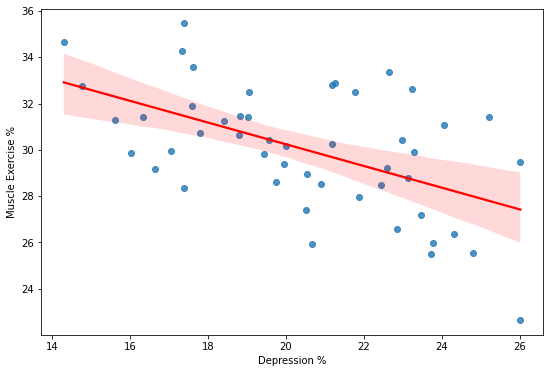

In [43]:
data = state_data[['Depression %', 'Muscle Exercise %']]
data = data.dropna()
# data = np.log(data)
sns.regplot(x = 'Depression %', y = 'Muscle Exercise %', data=data, line_kws={'color': 'red'})

<AxesSubplot:xlabel='Depression %', ylabel='Checkup Past 5 Years %'>

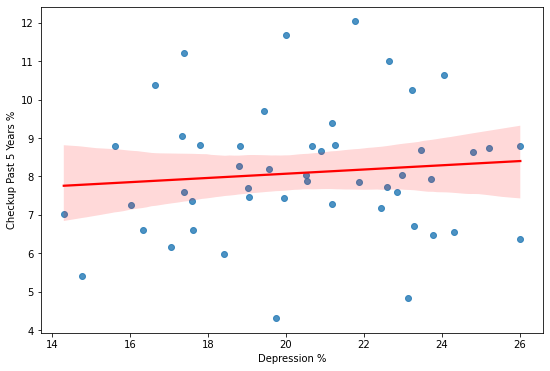

In [45]:
data = state_data[['Depression %', 'Checkup Past 5 Years %']]
data = data.dropna()
sns.regplot(x = 'Depression %', y = 'Checkup Past 5 Years %', data=data, line_kws={'color': 'red'})

My dependent variable is % of state population that has or has experienced depression in the past.

One independent variable I think may have influence on the dependent variable is Sufficient Sleep %, because sleep deprivation is harmful to ones mental wellbeing.

Another independent variable I chose was Binge Drinker %, since alcohol is a depressant and can exacerbate existing mental health conditions.

The third independent variable I chose was Obese %, because struggles with obesity can be a risk factor for depression.

In [47]:
dependent_name = ['Depression %']
independent_names = ['Sufficient Sleep %', 'Binge Drinker %', 'Obese %']
model_data = state_data[dependent_name + independent_names + ['geometry', 'Latitude', 'Longitude']]
model_data = model_data.dropna()

,Depression %,Sufficient Sleep %,Binge Drinker %,Obese %,Latitude,Longitude
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,20.468980,63.673469,17.024490,30.654694,39.555141,-90.961584
std,3.028308,3.404456,2.936828,3.775674,4.582941,14.935768
min,14.300000,58.000000,11.520000,22.640000,28.932000,-121.000000
25%,17.790000,61.000000,15.210000,28.060000,35.680900,-100.118400
50%,20.530000,63.500000,17.360000,31.300000,39.493200,-88.997700
75%,22.980000,66.000000,18.650000,33.000000,43.235500,-78.457900
max,26.010000,71.200000,25.630000,38.060000,47.522300,-68.985000


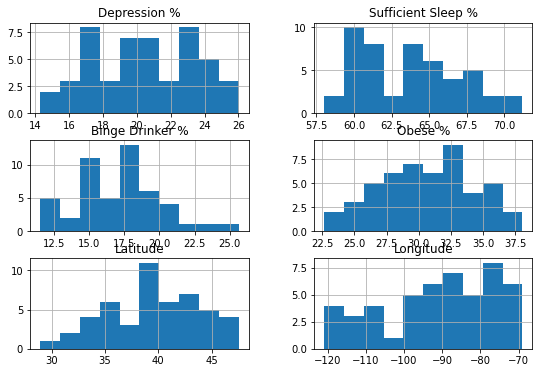

In [48]:
model_data.hist()
model_data.describe()

array([[<AxesSubplot:title={'center':'Depression %'}>,
        <AxesSubplot:title={'center':'Sufficient Sleep %'}>],
       [<AxesSubplot:title={'center':'Binge Drinker %'}>,
        <AxesSubplot:title={'center':'Obese %'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>]], dtype=object)

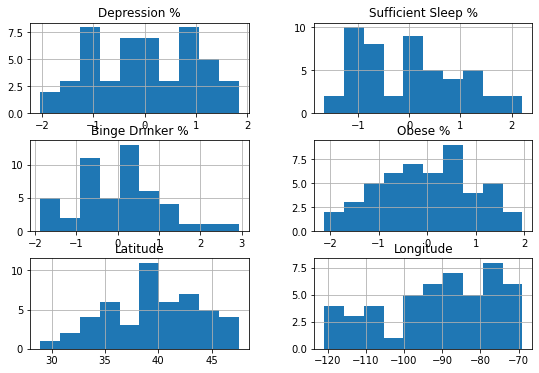

In [49]:
var_names = dependent_name + independent_names
model_data[var_names] = (model_data[var_names] - model_data[var_names].mean()) / model_data[var_names].std()
model_data.hist()

A R^2 value of 0.2551 indicates that 25.51% of variance in the dependent variable is explained by my model.

The variable that makes the most significant contribution to the model is Obese %, with a coefficient of 0.4197050.

The variable that makes the least significant contribution to the model is Sufficient Sleep %, with a coefficient of 0.1317929.

My model is unaffected by multi collinearity because all the VIFs are below 1.5.

In [50]:
ols_model = pysal.model.spreg.OLS(model_data[dependent_name].values, model_data[independent_names].values, name_y = dependent_name, name_x = independent_names)
print(ols_model.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :['Depression %']                Number of Observations:          49
Mean dependent var  :     -0.0000                Number of Variables   :           4
S.D. dependent var  :      1.0000                Degrees of Freedom    :          45
R-squared           :      0.2551
Adjusted R-squared  :      0.2054
Sum squared residual:      35.757                F-statistic           :      5.1358
Sigma-square        :       0.795                Prob(F-statistic)     :     0.00386
S.E. of regression  :       0.891                Log likelihood        :     -61.809
Sigma-square ML     :       0.730                Akaike info criterion :     131.618
S.E of regression ML:      0.8542                Schwarz criterion     :     139.185

-------------------------------------------------------------------------

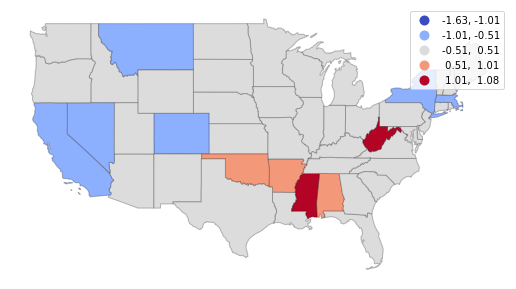

In [51]:
residuals = model_data
residuals["Residuals"] = ols_model.predy
axis = residuals.plot("Residuals", legend=True, cmap = "coolwarm", edgecolor = "#00000040", scheme="stdmean")
axis.set_axis_off()
plt.show()

In [52]:
pysal.model.spreg.vif(ols_model)

[None,
 (1.2486342569978082, 0.800875031576004),
 (1.1700993740016323, 0.8546282668112981),
 (1.1960868523178667, 0.8360596875236318)]

"Spatial regression models involve techniques that compensate for spatial autocorrelation so the model coefficients and outputs are more trustworthy" (https://michaelminn.net/tutorials/python-regression/).

My spatial error model is the best, because it has the lowest AIC value at 127.116 vs spatial lag with an AIC of 132.519 and non-spatial OLS with an AIC value of 131.618.

/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.0/lib/python3.8/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])


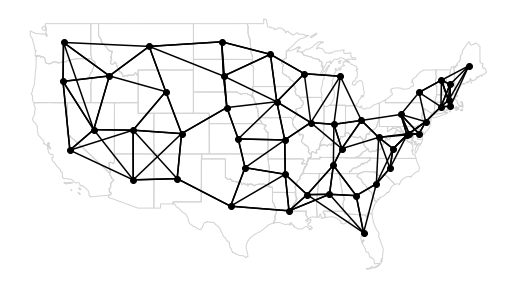

In [53]:
weights = pysal.lib.weights.KNN.from_dataframe(model_data, k=4)
axis = model_data.plot(edgecolor="lightgray", facecolor="none")
model_data["index"] = model_data.index
weights.plot(gdf=model_data, indexed_on='index', ax=axis)
axis.set_axis_off()
plt.show()

In [54]:
lag_model = pysal.model.spreg.ML_Lag(model_data[dependent_name].values, model_data[independent_names].values, weights)
print(lag_model.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          49
Mean dependent var  :     -0.0000                Number of Variables   :           5
S.D. dependent var  :      1.0000                Degrees of Freedom    :          44
Pseudo R-squared    :      0.2772
Spatial Pseudo R-squared:  0.2276
Sigma-square ML     :       0.708                Log likelihood        :     -61.259
S.E of regression   :       0.842                Akaike info criterion :     132.519
                                                 Schwarz criterion     :     141.978

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.0/lib/python3.8/site-packages/scipy/optimize/_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.0/lib/python3.8/site-packages/spreg/ml_lag.py:580: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))


In [55]:
err_model = pysal.model.spreg.ML_Error(model_data[dependent_name].values, model_data[independent_names].values, weights)
print(err_model.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          49
Mean dependent var  :     -0.0000                Number of Variables   :           4
S.D. dependent var  :      1.0000                Degrees of Freedom    :          45
Pseudo R-squared    :      0.2518
Sigma-square ML     :       0.637                Log likelihood        :     -59.558
S.E of regression   :       0.798                Akaike info criterion :     127.116
                                                 Schwarz criterion     :     134.683

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.0/lib/python3.8/site-packages/scipy/optimize/_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.0/lib/python3.8/site-packages/spreg/ml_error.py:485: RuntimeWarning: invalid value encountered in log
  jacob = np.log(np.linalg.det(a))
